#研究動機
###第一次租屋的同學,在沒有經驗與對當地環境不熟悉的情形下,最理想的狀況是先透過學校住宿組、生活輔導組的協助,先初步瞭解目前住宿居住狀況與當地行情,再透過學長姐的口碑介紹空餘房間,藉此瞭解屋況與房東、室友的狀況,以免遇到惡房東或屋況不佳的房子。大學周邊的租屋市場以前總是供不應求,但受到少子化影響,租客反而年年減少,根據統計,目前全台大學周邊待租住宅逾 3.2 萬間,可能會導致房東削價出租,根據這個議題,我們想要鎖定在世新大學附近的租屋市場,繼續探討其他會影響租金的原因。

#研究目的
####1. 探討世新學生租屋網的房租與租屋條件之間的影響。
####2. 探討房租對租屋處到學校距離的影響。
####3. 探討其他租屋條件,是否為重要遺漏變數。
####4. 透過本研究實證結果,提供世新大學租屋網的房東參考研究,同時也讓世新的學生對於房東的租金與租屋條件,更有討論的空間。

#資料說明
####利用世新大學租屋網的租屋資訊,比對不同的租屋條件,有不同的租金價格。選出距離、房型、房間數、坪數、電費、水費、網路費、性別限制、押金、洗衣機、第四台、電視、頂樓加蓋、冷氣、冰箱等變數,來進行分析。


![information](https://i.imgur.com/EI9ui9Z.png)

#研究方法
####利用多元迴歸,應變數為租金(rent),距離、房型、房間數、坪數、電費、水費、網路費、性別限制、押金、洗衣機、第四台、電視、頂樓加蓋、冷氣、冰箱為自變數。


####多元迴歸模型
ŷ= β0+ β1 shape + β2 distance + β3 room + β4 boy +β5 girl + β6 anyone
+ β7 deposit + β8 size + β9 electric +β10 water + β11 net + β12 wm +
Β13 four + β14 tv + β15 plus + β16 condition + β17 icebox

In [0]:
#世新租屋網 租金與租屋條件 表格
import pandas as pd

csv_url="https://docs.google.com/spreadsheets/d/e/2PACX-1vS9wpxLaKnhlTbLxAT9FC2jMtwBPYO5pDdmH-jVkitSGH5zQmcifvns5hnlEfWZrFVs5LkKsk7vOv_j/pub?gid=0&single=true&output=csv"
shu = pd.read_csv(csv_url)
shu

####租金
####學生租屋市場 大部分租金落在4000~6000之間

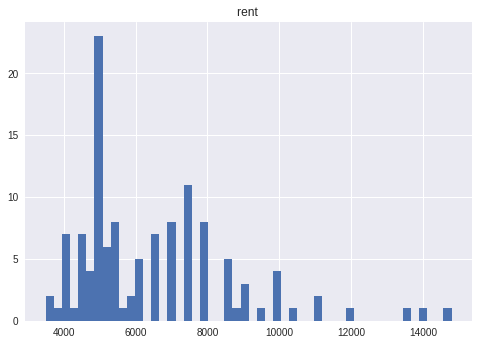

In [0]:
money = shu["rent"]
plt.hist(money, bins=50)
plt.title("rent ")
plt.show()

In [0]:
#確認 122 rows × 19 columns
import matplotlib.pyplot as plt
import pandas as pd

shu = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS9wpxLaKnhlTbLxAT9FC2jMtwBPYO5pDdmH-jVkitSGH5zQmcifvns5hnlEfWZrFVs5LkKsk7vOv_j/pub?gid=0&single=true&output=csv")
shu.shape

(122, 19)

####洗衣機變數

In [0]:
#變數wm為虛擬變數  洗衣機的提供   1為有提供  0為沒有提供


w_m = shu[shu["WM"] == 1]
w_m.shape


(121, 19)

In [0]:
grouped = shu.groupby("WM")
w_m = grouped["rent"].count().sort_values(ascending=False)

In [0]:
w_m.index

Int64Index([1, 0], dtype='int64', name='WM')

In [0]:
w_m.values

array([121,   1])

####洗衣機提供數量圖
####這邊說明了幾乎所有9成的房東都有提供洗衣機     
####而其他水費、網路費、冷氣、冰箱這些變數 也都呈現這樣的狀況
####從這邊看出沒有提供這些項目的房東
####需不要也提供 來增加自己的競爭力

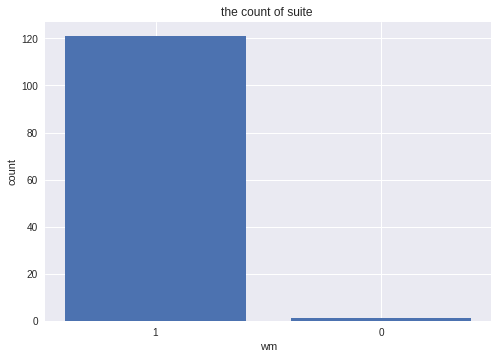

In [0]:
long = len(w_m.values)
plt.bar(range(long), w_m.values)
plt.xticks(range(long), w_m.index)
plt.title("the count of suite ")
plt.xlabel("wm")
plt.ylabel("count")
plt.show()

####在研究發現距離並不顯著，增加距離的平方，建立新的方程式
####透過距離的非線性迴歸，發現隨著距離越遠租金越便宜，而到了1.75km，租金的邊際又會提高，可能是因為有較高的品質

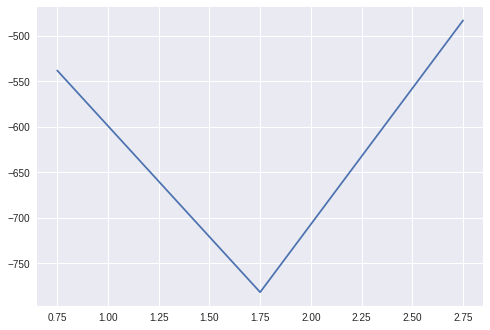

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

x = np.arange(0.75,3)
y = 271*(x*x)-921*x

plt.plot(x,y)
plt.show()


#結論與政策建議
####在相同租金的情況下，如果房東沒有提供水費、網路費、洗衣機、冷氣、冰箱這些項目，或許可以考慮提供以增加競爭力，學生也可以跟房東有更多的討論空間。雖然租屋條件限女比限男還要多，但是研究發現性別影響並不顯著，是一個性別平等的租屋市場。綜合以上，世新租屋網是一個友善的租屋市場。

####政策建議方面，對於以學校為中心，超過 1.7 公里給予補助(交通費)，提供誘因，讓想租屋的學生有更多的選擇，解決世新附近潮濕的問題。